In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [158]:
# 1. Membaca data dari file CSV
data = pd.read_csv('warung_padang_data.csv')

In [159]:
# 2. Menampilkan tabel data penjualan
print("Tabel Data Penjualan:")
print(data)

Tabel Data Penjualan:
       tanggal    hari  rendang  gulai_ayam  sayur_asam  sambal_ijo  \
0   2023-03-01    Rabu       40          35          30          25   
1   2023-03-02   Kamis       35          30          25          20   
2   2023-03-03   Jumat       55          50          40          35   
3   2023-03-04   Sabtu       60          55          45          40   
4   2023-03-05  Minggu       70          65          55          45   
..         ...     ...      ...         ...         ...         ...   
56  2023-04-26    Rabu       55          50          45          40   
57  2023-04-27   Kamis       60          55          50          45   
58  2023-04-28   Jumat       70          65          55          50   
59  2023-04-29   Sabtu       75          70          60          55   
60  2023-04-30  Minggu       85          80          70          60   

    telur_dadar  total_penjualan  
0            20          1250000  
1            15          1150000  
2            30     

In [160]:
# 3. Memisahkan fitur dan target
X = data[['hari']].copy()  # Membuat salinan untuk menghindari view
y_cols = ['rendang', 'gulai_ayam', 'sayur_asam', 'sambal_ijo', 'telur_dadar']

In [161]:
# 4. Membuat data baru untuk prediksi bulan depan
data_baru = pd.DataFrame({'hari': range(1, 31)})

In [162]:
# 5. Mengonversi tipe data kolom 'hari' menjadi string
X['hari'] = X['hari'].astype(str)
data_baru['hari'] = data_baru['hari'].astype(str)

In [163]:
# 6. Menggabungkan nilai-nilai 'hari' dari data pelatihan dan data baru
all_hari_values = pd.concat([X['hari'], data_baru['hari']])

In [164]:
# 7. Melakukan label encoding pada semua nilai 'hari'
label_encoder = LabelEncoder()
all_hari_values = label_encoder.fit_transform(all_hari_values)

In [165]:
# 8. Memisahkan kembali nilai-nilai 'hari' untuk data pelatihan dan data baru
X['hari'] = all_hari_values[:len(X)]
data_baru['hari'] = all_hari_values[len(X):]

In [166]:
# 9. Melakukan One-hot encoding pada kolom 'hari'
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

In [167]:
# 10. Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_encoded, data[y_cols], test_size=0.2, random_state=42)

In [168]:
# 11. Membangun model Linear Regression untuk setiap jenis makanan
models = {}
for col in y_cols:
    model = LinearRegression()
    model.fit(X_train, y_train[col])
    models[col] = model

In [169]:
# 12. Melakukan One-hot encoding pada data baru
data_baru_encoded = encoder.transform(data_baru[['hari']])

In [170]:
# 13. Melakukan prediksi penjualan untuk bulan depan
prediksi_penjualan = {}
for col in y_cols:
    prediksi_penjualan[col] = models[col].predict(data_baru_encoded)
    total_prediksi = sum(prediksi_penjualan[col])
    print(f"Prediksi Total Penjualan {col.capitalize()} untuk Bulan Depan: {int(total_prediksi)} porsi")

    # Menghitung rata-rata penjualan per hari pada bulan sebelumnya
    rata_rata_penjualan_sebelumnya = data[col].mean()

    # Menghitung persentase peningkatan produksi yang disarankan
    peningkatan_produksi = (total_prediksi / 30 - rata_rata_penjualan_sebelumnya) / rata_rata_penjualan_sebelumnya * 100
    print(f"Saran Peningkatan Produksi {col.capitalize()}: {peningkatan_produksi:.2f}%")

    # Simulasi untuk makanan yang tidak terlalu laku (Telur Dadar)
    if col == 'telur_dadar' and peningkatan_produksi < 0:
        print(f"Makanan {col.capitalize()} tidak terlalu laku, disarankan untuk mengurangi produksi.")

Prediksi Total Penjualan Rendang untuk Bulan Depan: 1657 porsi
Saran Peningkatan Produksi Rendang: 0.91%
Prediksi Total Penjualan Gulai_ayam untuk Bulan Depan: 1507 porsi
Saran Peningkatan Produksi Gulai_ayam: 1.01%
Prediksi Total Penjualan Sayur_asam untuk Bulan Depan: 1290 porsi
Saran Peningkatan Produksi Sayur_asam: 1.52%
Prediksi Total Penjualan Sambal_ijo untuk Bulan Depan: 1121 porsi
Saran Peningkatan Produksi Sambal_ijo: 1.84%
Prediksi Total Penjualan Telur_dadar untuk Bulan Depan: 971 porsi
Saran Peningkatan Produksi Telur_dadar: 2.13%


In [171]:
# 14. Menghitung total prediksi penjualan untuk bulan depan
total_penjualan = sum(data['total_penjualan'])
print(f"\nPrediksi Total Penjualan untuk Bulan Depan: Rp {int(total_penjualan)}")


Prediksi Total Penjualan untuk Bulan Depan: Rp 116550000



Tabel Data Penjualan Rendang:
      hari  rendang
0     Rabu       40
1    Kamis       35
2    Jumat       55
3    Sabtu       60
4   Minggu       70
..     ...      ...
56    Rabu       55
57   Kamis       60
58   Jumat       70
59   Sabtu       75
60  Minggu       85

[61 rows x 2 columns]


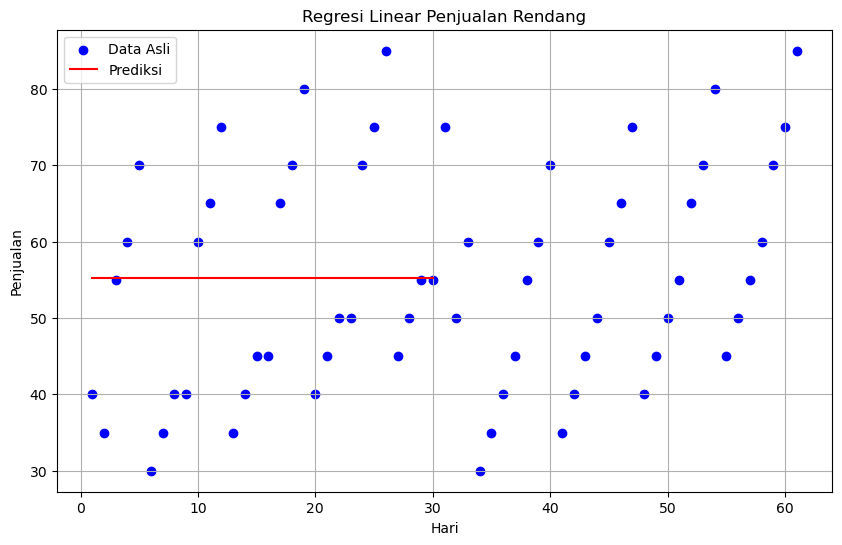


Tabel Data Penjualan Gulai_ayam:
      hari  gulai_ayam
0     Rabu          35
1    Kamis          30
2    Jumat          50
3    Sabtu          55
4   Minggu          65
..     ...         ...
56    Rabu          50
57   Kamis          55
58   Jumat          65
59   Sabtu          70
60  Minggu          80

[61 rows x 2 columns]


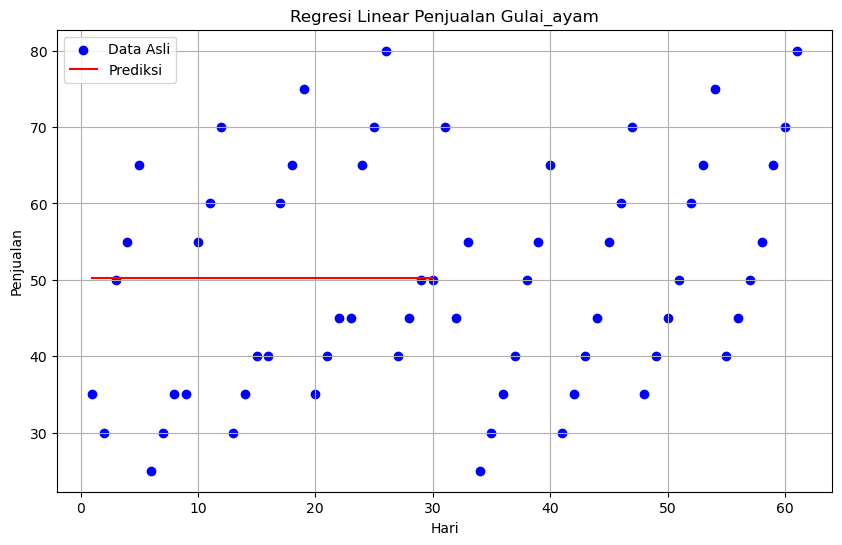


Tabel Data Penjualan Sayur_asam:
      hari  sayur_asam
0     Rabu          30
1    Kamis          25
2    Jumat          40
3    Sabtu          45
4   Minggu          55
..     ...         ...
56    Rabu          45
57   Kamis          50
58   Jumat          55
59   Sabtu          60
60  Minggu          70

[61 rows x 2 columns]


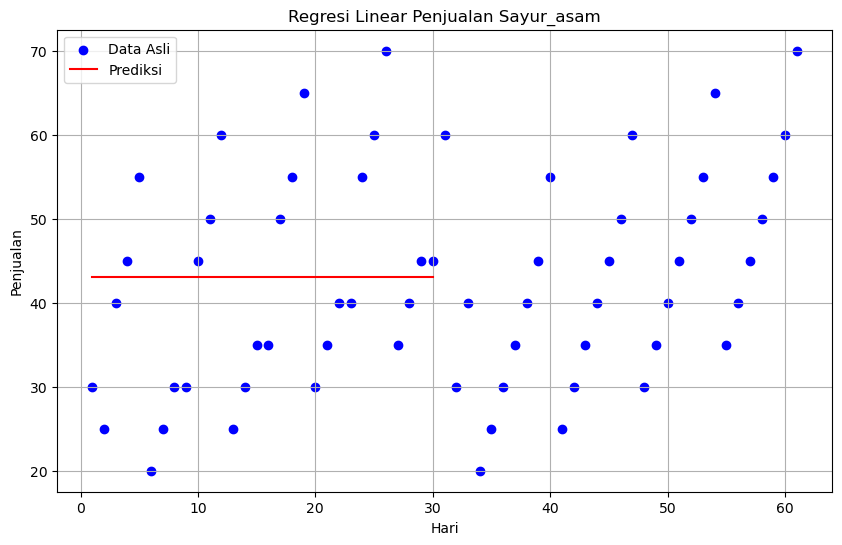


Tabel Data Penjualan Sambal_ijo:
      hari  sambal_ijo
0     Rabu          25
1    Kamis          20
2    Jumat          35
3    Sabtu          40
4   Minggu          45
..     ...         ...
56    Rabu          40
57   Kamis          45
58   Jumat          50
59   Sabtu          55
60  Minggu          60

[61 rows x 2 columns]


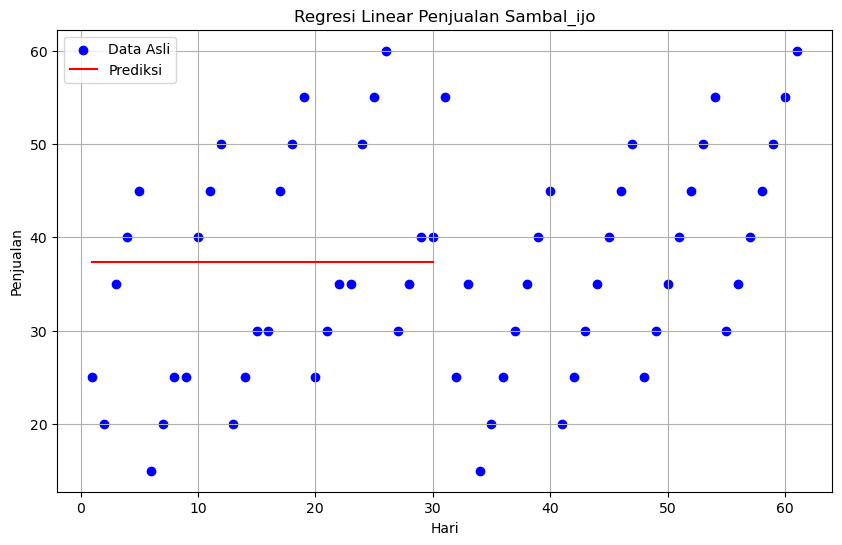


Tabel Data Penjualan Telur_dadar:
      hari  telur_dadar
0     Rabu           20
1    Kamis           15
2    Jumat           30
3    Sabtu           35
4   Minggu           40
..     ...          ...
56    Rabu           35
57   Kamis           40
58   Jumat           45
59   Sabtu           50
60  Minggu           55

[61 rows x 2 columns]


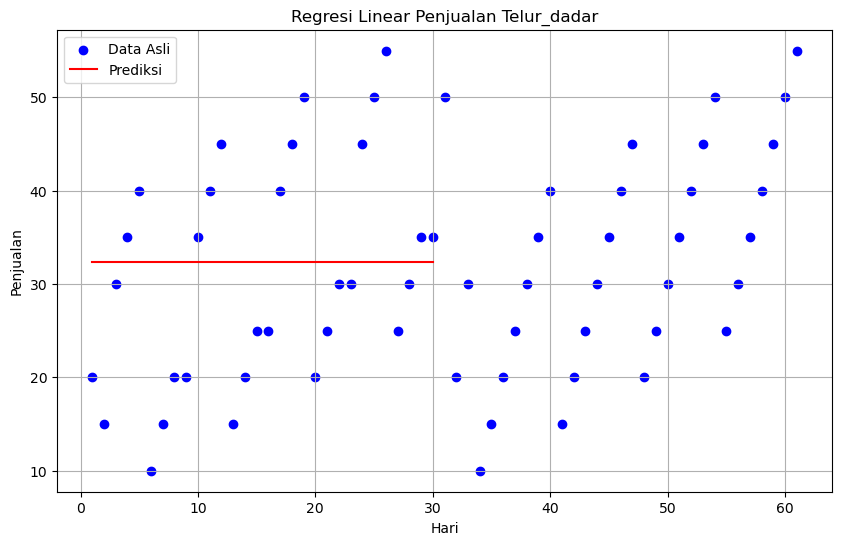

In [172]:
# 15. Menampilkan tabel data penjualan per menu dan plot regresi
for col in y_cols:
    # Menampilkan tabel data penjualan per menu
    print(f"\nTabel Data Penjualan {col.capitalize()}:")
    print(data[['hari', col]])

    # Plot regresi untuk setiap jenis makanan
    plt.figure(figsize=(10, 6))
    hari_asli = np.arange(1, len(data) + 1)
    hari_prediksi = np.arange(1, 31)
    
    # Plot data asli
    plt.scatter(hari_asli, data[col], color='blue', label='Data Asli')
    
    # Plot prediksi penjualan
    plt.plot(hari_prediksi, prediksi_penjualan[col], color='red', label='Prediksi')
    
    plt.xlabel('Hari')
    plt.ylabel('Penjualan')
    plt.title(f'Regresi Linear Penjualan {col.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()